## Подгружаем бибилиотеки, устанавливаем размер и качество изображений

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tsfresh import extract_features
plt.style.use('seaborn')

import numpy as np
import datetime
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = (12, 5)

# Загружаем DataFrame из https://www.kaggle.com/ukveteran/daily-min-temperatures

In [4]:
df = pd.read_csv('daily-min-temperatures.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [5]:
df.columns = ['date', 'temp']

In [6]:
df

,date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


## Генерируем признаки с помощью extract_features

In [39]:
df_extract = extract_features(df, column_id='date', n_jobs=4)

Feature Extraction: 100%|██████████| 20/20 [01:27<00:00,  4.38s/it]


In [40]:
df_extract

,temp__variance_larger_than_standard_deviation,temp__has_duplicate_max,temp__has_duplicate_min,temp__has_duplicate,temp__sum_values,temp__abs_energy,temp__mean_abs_change,temp__mean_change,temp__mean_second_derivative_central,temp__median,...,temp__permutation_entropy__dimension_5__tau_1,temp__permutation_entropy__dimension_6__tau_1,temp__permutation_entropy__dimension_7__tau_1,temp__query_similarity_count__query_None__threshold_0.0,"temp__matrix_profile__feature_""min""__threshold_0.98","temp__matrix_profile__feature_""max""__threshold_0.98","temp__matrix_profile__feature_""mean""__threshold_0.98","temp__matrix_profile__feature_""median""__threshold_0.98","temp__matrix_profile__feature_""25""__threshold_0.98","temp__matrix_profile__feature_""75""__threshold_0.98"
1981-01-01,0.0,0.0,0.0,0.0,20.7,428.49,NaN,NaN,NaN,20.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-02,0.0,0.0,0.0,0.0,17.9,320.41,NaN,NaN,NaN,17.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-03,0.0,0.0,0.0,0.0,18.8,353.44,NaN,NaN,NaN,18.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-04,0.0,0.0,0.0,0.0,14.6,213.16,NaN,NaN,NaN,14.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-01-05,0.0,0.0,0.0,0.0,15.8,249.64,NaN,NaN,NaN,15.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,0.0,0.0,0.0,0.0,14.0,196.00,NaN,NaN,NaN,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-28,0.0,0.0,0.0,0.0,13.6,184.96,NaN,NaN,NaN,13.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-29,0.0,0.0,0.0,0.0,13.5,182.25,NaN,NaN,NaN,13.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-12-30,0.0,0.0,0.0,0.0,15.7,246.49,NaN,NaN,NaN,15.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Избавляюсь от столбцов, где процент NaN более 10%. А там, где меньше, заполняю средним значением. Делаю копию полученного датафрейма, чтобы не перезапускать extract_features, если "сломаю" датафрейм

In [68]:
df_copy = df_extract.copy()

In [69]:
drop_column = []
for column in df_copy.columns:
    if (len(df_copy[column][pd.isna(
        df_copy[column])]) * 100 / len(df_copy[column]) > 10):
        drop_column.append(column)
df_copy = df_copy.drop(drop_column, axis=1)

for column in df_copy.columns:
    df_copy[column].fillna(df_copy[column].mean(), inplace=True)

In [70]:
### Избавляюсь от столбцов, в которых содержится только нули

In [72]:
df_copy = df_copy.loc[:, (df_copy != 0).any(axis=0)]    
df_copy

,temp__sum_values,temp__abs_energy,temp__median,temp__mean,temp__length,temp__root_mean_square,temp__last_location_of_maximum,temp__last_location_of_minimum,temp__ratio_value_number_to_time_series_length,temp__maximum,...,temp__range_count__max_1__min_-1,temp__range_count__max_1000000000000.0__min_0,temp__energy_ratio_by_chunks__num_segments_10__segment_focus_0,temp__count_above__t_0,temp__count_below__t_0,temp__lempel_ziv_complexity__bins_2,temp__lempel_ziv_complexity__bins_3,temp__lempel_ziv_complexity__bins_5,temp__lempel_ziv_complexity__bins_10,temp__lempel_ziv_complexity__bins_100
1981-01-01,20.7,428.49,20.7,20.7,1.0,20.7,1.0,1.0,1.0,20.7,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1981-01-02,17.9,320.41,17.9,17.9,1.0,17.9,1.0,1.0,1.0,17.9,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1981-01-03,18.8,353.44,18.8,18.8,1.0,18.8,1.0,1.0,1.0,18.8,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1981-01-04,14.6,213.16,14.6,14.6,1.0,14.6,1.0,1.0,1.0,14.6,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1981-01-05,15.8,249.64,15.8,15.8,1.0,15.8,1.0,1.0,1.0,15.8,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990-12-27,14.0,196.00,14.0,14.0,1.0,14.0,1.0,1.0,1.0,14.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1990-12-28,13.6,184.96,13.6,13.6,1.0,13.6,1.0,1.0,1.0,13.6,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1990-12-29,13.5,182.25,13.5,13.5,1.0,13.5,1.0,1.0,1.0,13.5,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1990-12-30,15.7,246.49,15.7,15.7,1.0,15.7,1.0,1.0,1.0,15.7,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


### Использую разбиение TimeSeriesSplit

In [80]:
from sklearn.model_selection import TimeSeriesSplit

In [81]:
tss = TimeSeriesSplit(6)

In [82]:
y = df.temp

In [83]:
X = df_copy.values

## Обучаю дерево, заполняю массивы с MSE, чтобы получить график ошибок

In [84]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [85]:
rf = RandomForestRegressor(n_estimators=200)

In [86]:
rf_train_mse = []
rf_test_mse = []

for train_index, test_index in tss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf.fit(X_train, y_train)
    
    rf_train_mse.append(mean_squared_error(y_train, rf.predict(X_train)))
    rf_test_mse.append(mean_squared_error(y_test, rf.predict(X_test)))
    

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

TRAIN: [   0    1    2 ... 2084 2085 2086] TEST: [2087 2088 2089 2090 2091 2092 2093 2094 2095 2096 2097 2098 2099 2100
 2101 2102 2103 2104 2105 2106 2107 2108 2109 2110 2111 2112 2113 2114
 2115 2116 2117 2118 2119 2120 2121 2122 2123 2124 2125 2126 2127 2128
 2129 2130 2131 2132 2133 2134 2135 2136 2137 2138 2139 2140 2141 2142
 2143 2144 2145 2146 2147 2148 2149 2150 2151 2152 2153 2154 2155 2156
 2157 2158 2159 2160 2161 2162 2163 2164 2165 2166 2167 2168 2169 2170
 2171 2172 2173 2174 2175 2176 2177 2178 2179 2180 2181 2182 2183 2184
 2185 2186 2187 2188 2189 2190 2191 2192 2193 2194 2195 2196 2197 2198
 2199 2200 2201 2202 2203 2204 2205 2206 2207 2208 2209 2210 2211 2212
 2213 2214 2215 2216 2217 2218 2219 2220 2221 2222 2223 2224 2225 2226
 2227 2228 2229 2230 2231 2232 2233 2234 2235 2236 2237 2238 2239 2240
 2241 2242 2243 2244 2245 2246 2247 2248 2249 2250 2251 2252 2253 2254
 2255 2256 2257 2258 2259 2260 2261 2262 2263 2264 2265 2266 2267 2268
 2269 2270 2271 2272 2273 22

In [25]:
rf_train_mse

[0.0015442204198472336,
 0.00032033301435404514,
 0.00017656082375477308,
 0.00013132654528030365,
 9.991305598157558e-05,
 7.388263023328825e-05]

In [26]:
rf_train_mse

[0.0015442204198472336,
 0.00032033301435404514,
 0.00017656082375477308,
 0.00013132654528030365,
 9.991305598157558e-05,
 7.388263023328825e-05]

## Вывожу график

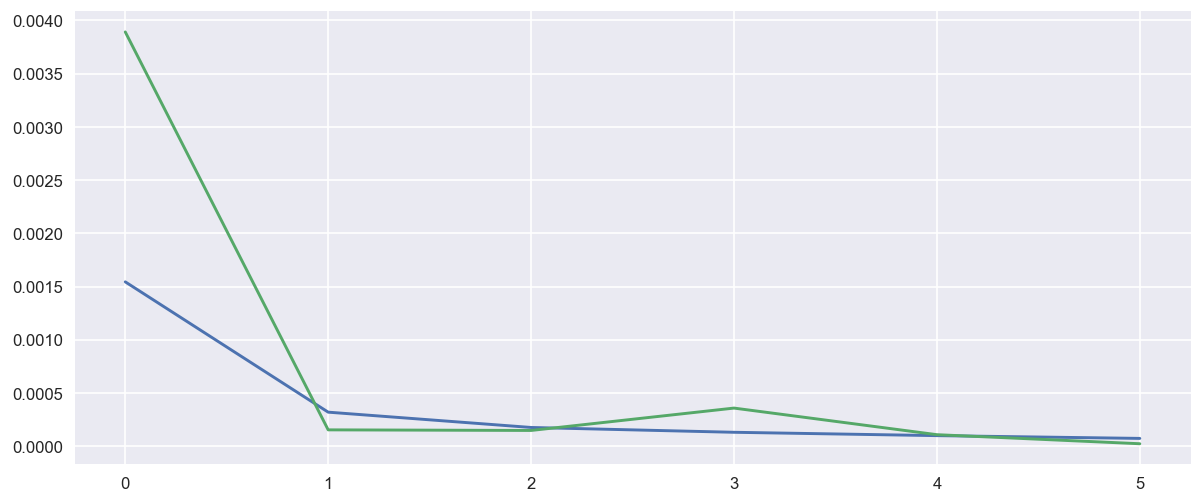

In [28]:
plt.plot(rf_train_mse)
plt.plot(rf_test_mse)

## Использую линейную регрессию

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

lr_train_mse = []
lr_test_mse = []

for train_index, test_index in tss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr.fit(X_train, y_train)
    
    lr_train_mse.append(mean_squared_error(y_train, lr.predict(X_train)))
    lr_test_mse.append(mean_squared_error(y_test, lr.predict(X_test)))

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [87]:
lr_train_mse

[2.657983658220318e-29,
 9.898473713004352e-29,
 2.710366405803091e-28,
 2.1643601569681937e-29,
 1.2706073742459953e-29,
 1.3668737814729276e-29]

In [88]:
lr_test_mse

[2.288584203106053e-29,
 1.0624330509220887e-28,
 1.9959973015022575e-28,
 2.2373613185805867e-29,
 1.2740538931239208e-29,
 1.388872143640314e-29]

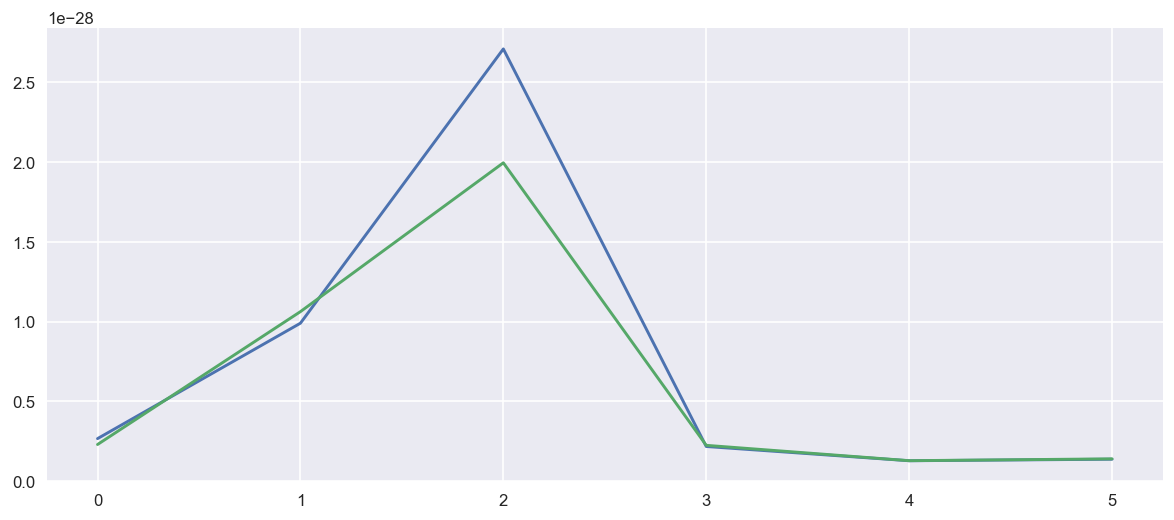

In [89]:
plt.plot(lr_train_mse)
plt.plot(lr_test_mse)

## Использую метод ближайших соседей

In [90]:
from sklearn.neighbors import KNeighborsRegressor

In [91]:
knr = KNeighborsRegressor()

knr_train_mse = []
knr_test_mse = []

for train_index, test_index in tss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knr.fit(X_train, y_train)
    
    knr_train_mse.append(mean_squared_error(y_train, knr.predict(X_train)))
    knr_test_mse.append(mean_squared_error(y_test, knr.predict(X_test)))

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

TRAIN: [   0    1    2 ... 3126 3127 3128] TEST: [3129 3130 3131 3132 3133 3134 3135 3136 3137 3138 3139 3140 3141 3142
 3143 3144 3145 3146 3147 3148 3149 3150 3151 3152 3153 3154 3155 3156
 3157 3158 3159 3160 3161 3162 3163 3164 3165 3166 3167 3168 3169 3170
 3171 3172 3173 3174 3175 3176 3177 3178 3179 3180 3181 3182 3183 3184
 3185 3186 3187 3188 3189 3190 3191 3192 3193 3194 3195 3196 3197 3198
 3199 3200 3201 3202 3203 3204 3205 3206 3207 3208 3209 3210 3211 3212
 3213 3214 3215 3216 3217 3218 3219 3220 3221 3222 3223 3224 3225 3226
 3227 3228 3229 3230 3231 3232 3233 3234 3235 3236 3237 3238 3239 3240
 3241 3242 3243 3244 3245 3246 3247 3248 3249 3250 3251 3252 3253 3254
 3255 3256 3257 3258 3259 3260 3261 3262 3263 3264 3265 3266 3267 3268
 3269 3270 3271 3272 3273 3274 3275 3276 3277 3278 3279 3280 3281 3282
 3283 3284 3285 3286 3287 3288 3289 3290 3291 3292 3293 3294 3295 3296
 3297 3298 3299 3300 3301 3302 3303 3304 3305 3306 3307 3308 3309 3310
 3311 3312 3313 3314 3315 33

In [92]:
knr_test_mse

[0.02246679462571976,
 0.0011078694817658302,
 0.000456046065259117,
 0.0012422264875239784,
 0.0002510556621880987,
 9.289827255278278e-05]

In [93]:
knr_train_mse

[0.011049618320610693,
 0.002009952153110051,
 0.0014919540229885054,
 0.001067177767129851,
 0.0006443251533742344,
 0.0005263023330137439]

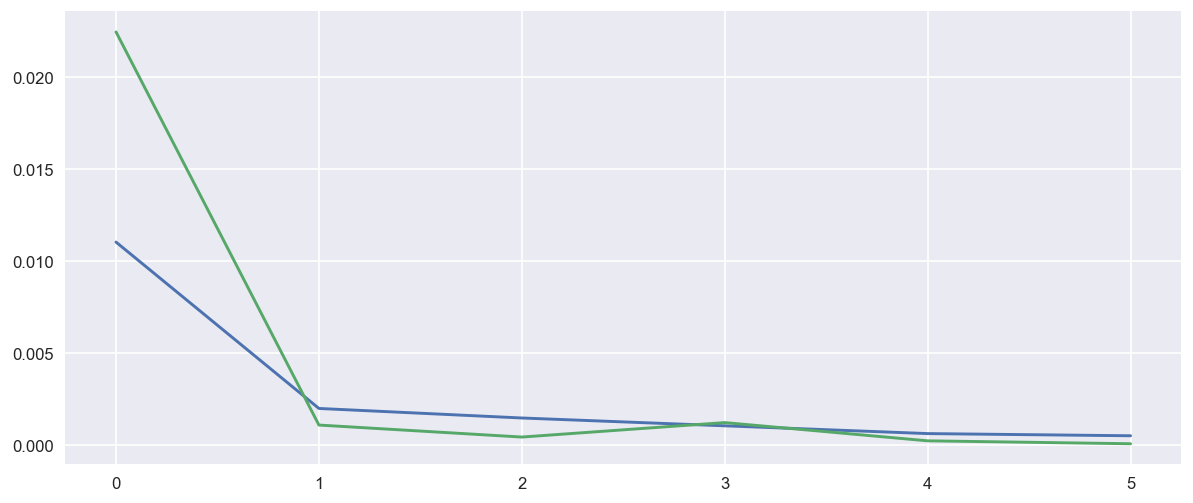

In [94]:
plt.plot(knr_train_mse)
plt.plot(knr_test_mse)

## Вывожу ошибки на один график

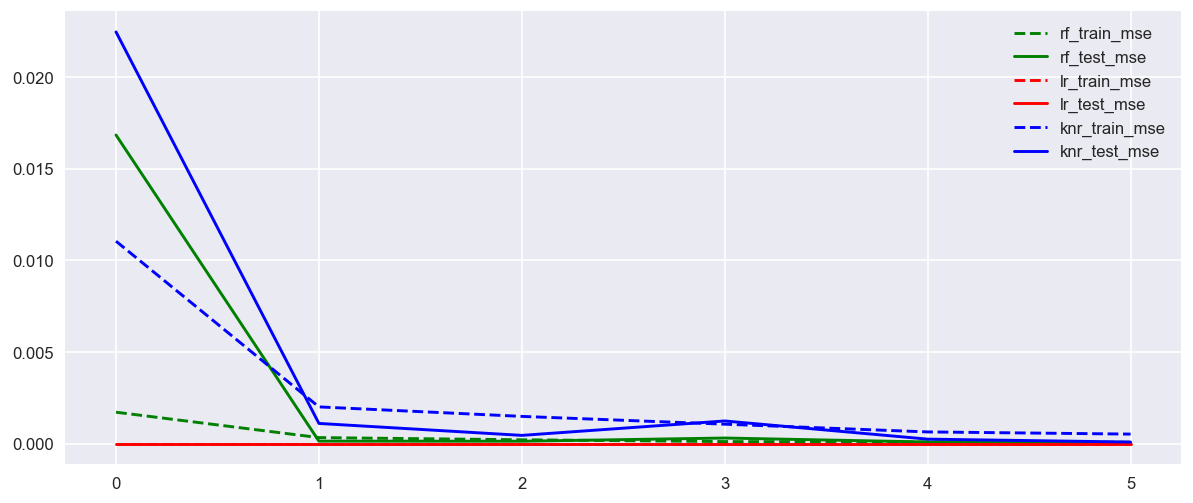

In [115]:
plt.plot(rf_train_mse, color = 'green', linestyle = 'dashed')
plt.plot(rf_test_mse, color = 'green')
plt.plot(lr_train_mse, color = 'red',  linestyle = 'dashed')
plt.plot(lr_test_mse, color = 'red',)
plt.plot(knr_train_mse,color = 'blue', linestyle = 'dashed')
plt.plot(knr_test_mse, color = 'blue', )
plt.legend(['rf_train_mse', 'rf_test_mse', 'lr_train_mse', 'lr_test_mse', 'knr_train_mse', 'knr_test_mse']);